# Term Plan and Duration Prediction project using Random Forest and Machine Learning

1. Objective: Predict the duration or term of a plan based on customer data and preferences.

2. Dataset: Use a dataset containing features like customer age, income, plan type, coverage amount, and past purchase behavior.

3. Preprocessing: Clean the data, fill missing values, and convert categorical data into numerical form.

4. Algorithm: Implement the Random Forest algorithm for regression to predict plan duration.

5. Data Splitting: Split the data into training and testing sets to train and validate the model.

6. Model Training: Train the Random Forest model using the training dataset to capture complex patterns in the data.

7. Hyperparameter Tuning: Optimize parameters like the number of trees and depth for better accuracy.

8. Evaluation Metrics: Use regression metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared to evaluate performance.

9. Feature Importance: Analyze which customer features have the most influence on the plan duration.

10. Insights and Predictions: Provide actionable insights to businesses to design better term plans and predict durations accurately for new customers.



In [21]:
import pandas as pd

In [22]:
data = pd.read_csv('bank-marketing.csv',delimiter= ';')

In [23]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [25]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [26]:
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [27]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
data['y'] = data['y'].map({'no':0,'yes':1})

In [29]:
data['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
cat = data.select_dtypes(include=['object']).columns

In [32]:
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [33]:
num = data.select_dtypes(include=['float64','int64']).columns

In [34]:
num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [35]:
label_encoders = {}
for col in cat:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [36]:
label_encoders

{'job': LabelEncoder(),
 'marital': LabelEncoder(),
 'education': LabelEncoder(),
 'default': LabelEncoder(),
 'housing': LabelEncoder(),
 'loan': LabelEncoder(),
 'contact': LabelEncoder(),
 'month': LabelEncoder(),
 'day_of_week': LabelEncoder(),
 'poutcome': LabelEncoder()}

In [37]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [38]:
data.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [39]:
num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [40]:
num  = num.drop('y')

In [41]:
num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
data[num] = sc.fit_transform(data[num])

In [45]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,3,1,0,0,0,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
1,1.628993,7,1,3,1,0,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
2,-0.290186,7,1,3,0,2,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
3,-0.002309,0,1,1,0,0,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
4,1.533034,7,1,3,0,0,2,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,5,1,5,0,2,0,0,7,0,...,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1
41184,0.573445,1,1,5,0,0,0,0,7,0,...,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41185,1.533034,5,1,6,0,2,0,0,7,0,...,-0.204909,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41186,0.381527,9,1,5,0,0,0,0,7,0,...,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1


In [46]:
import seaborn as sns

In [ ]:
pd.DataFrame.corr()

<Axes: >

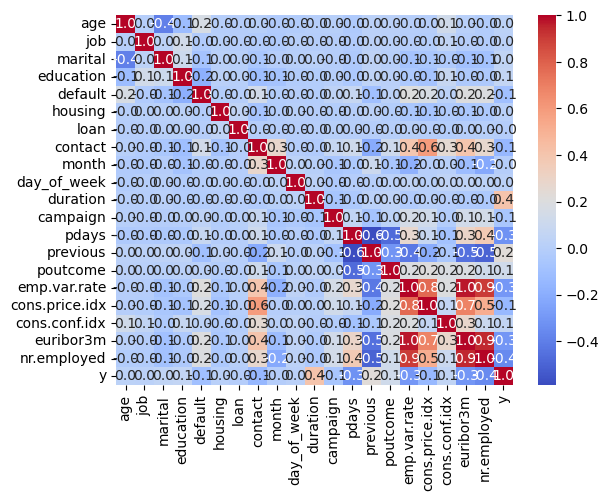

In [48]:
sns.heatmap(data.corr(),annot=True,fmt='.1f',cmap='coolwarm')

<Axes: >

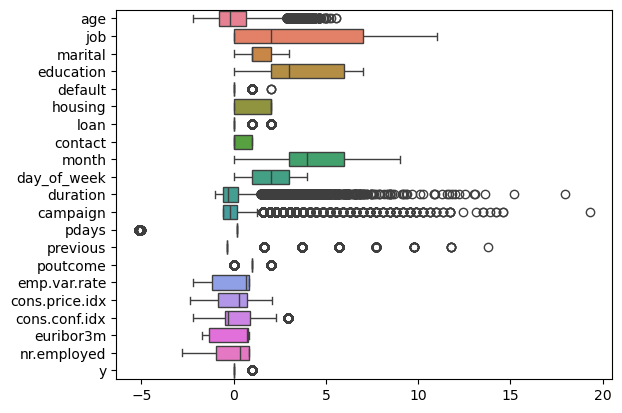

In [73]:
sns.boxplot(data=data,orient='h')

In [50]:
X_class = data.drop('y',axis=1)
y_class = data['y']
X_reg = data.drop('duration',axis=1)
y_reg = data['duration']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X_class,y_class,test_size=0.2)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
RFC = RandomForestClassifier(n_estimators=100)

In [55]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
y_pred = RFC.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
conf = confusion_matrix(y_test,y_pred)

In [59]:
conf

array([[7058,  267],
       [ 459,  454]], dtype=int64)

In [61]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X_reg,y_reg,test_size=0.2)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
RFR = RandomForestRegressor(n_estimators=100)

In [65]:
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [66]:
y_pred = RFR.predict(X_test)

In [70]:
from sklearn.metrics import r2_score,mean_absolute_error

In [71]:
mean_absolute_error(y_test,y_pred)

0.6087320938058735

In [72]:
r2_score(y_test,y_pred)

0.1903214473460495